## 데이터 로드

In [1]:
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from glob import glob
import matplotlib
import seaborn as sns
import PIL
PIL.Image

<module 'PIL.Image' from 'C:\\Users\\seho\\anaconda3\\lib\\site-packages\\PIL\\Image.py'>

In [17]:
def load_CIFAR10(path):
    
    path = path
    images = []
    labels = []
    for filename in glob(path + '*'):
        for img in glob(filename + "/*.jpg"):
            an_img = PIL.Image.open(img)
            img_array = np.array(an_img)
            images.append(img_array)
            label = filename.split('/')[2]
            labels.append(label)
    images = np.array(images)
    labels = np.array(labels)
    
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    labels = le.fit_transform(labels)
    labels = labels.reshape(-1, 1)
    
    return images, labels

In [18]:
train_images, train_labels = load_CIFAR10(path = './data/train/')

In [19]:
print('train 이미지 크기 : ', train_images.shape)
print('train 라벨 크기 : ', train_labels.shape)

train 이미지 크기 :  (50000, 32, 32, 3)
train 라벨 크기 :  (50000, 1)


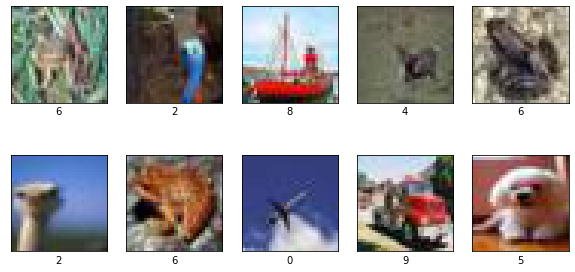

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = [10, 5])
for i in range(10):
    import random
    num = random.randint(0, 50000)
    plt.subplot(2, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(train_labels[num][0])
    plt.imshow(train_images[num])
plt.show()

In [23]:
print(np.unique(train_labels))

[0 1 2 3 4 5 6 7 8 9]


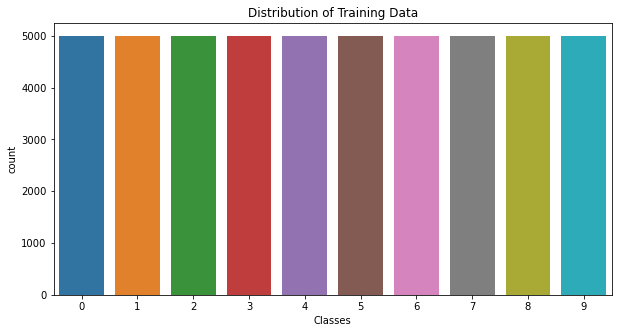

In [24]:
plt.figure(figsize = [10, 5])
sns.countplot(train_labels.ravel())
plt.title('Distribution of Training Data')
plt.xlabel('Classes')
plt.show()

In [25]:
os.environ['CUDA_VISIBLE_DEVICES'] = 'cpu'

In [26]:
path = './data/test/'

test_images = []
test_idx = []

first = sorted(glob(path + '*.jpg'))

for filename in first:
    an_img = PIL.Image.open(filename)
    img_array = np.array(an_img)
    test_images.append(img_array)
    
    label = filename.split('/')[2]
    test_idx.append(label)
    
test_images = np.array(test_images)

print(test_images.shape)
print(test_idx[0:5])

(10000, 32, 32, 3)
['test\\0000.jpg', 'test\\0001.jpg', 'test\\0002.jpg', 'test\\0003.jpg', 'test\\0004.jpg']


[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],

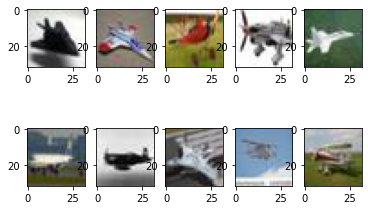

In [27]:
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i])
    print(train_labels[i], end = ',')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(train_images, train_labels, test_size = 0.2, random_state = 42)

test = test_images

In [29]:
print('X_tr 크기 : ', X_tr.shape)
print('X_val 크기 : ', X_val.shape)
print('test 크기 : ', test.shape)

X_tr 크기 :  (40000, 32, 32, 3)
X_val 크기 :  (10000, 32, 32, 3)
test 크기 :  (10000, 32, 32, 3)


In [30]:
X_tr = X_tr / 255.0
X_val = X_val / 255.0
test = test / 255.0

In [31]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', padding = 'SAME', input_shape = (32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2, padding = 'SAME'),
    tf.keras.layers.Dropout(0.23),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'SAME'),
    tf.keras.layers.MaxPooling2D(2, 2, padding = 'SAME'),
    tf.keras.layers.Dropout(0.23),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'SAME'),
    tf.keras.layers.MaxPooling2D(2, 2, padding = 'SAME'),
    tf.keras.layers.Dropout(0.23),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          9

In [33]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [34]:
model.fit(X_tr, y_tr, validation_data = (X_val, y_val), epochs = 50, batch_size = 128)

Epoch 1/50
313/313 [==============================] - 27s 84ms/step - loss: 1.7873 - accuracy: 0.3441 - val_loss: 1.5380 - val_accuracy: 0.4514
Epoch 2/50
313/313 [==============================] - 25s 80ms/step - loss: 1.4659 - accuracy: 0.4675 - val_loss: 1.3598 - val_accuracy: 0.5164
Epoch 3/50
313/313 [==============================] - 24s 76ms/step - loss: 1.3434 - accuracy: 0.5138 - val_loss: 1.2553 - val_accuracy: 0.5538
Epoch 4/50
313/313 [==============================] - 25s 81ms/step - loss: 1.2727 - accuracy: 0.5432 - val_loss: 1.1730 - val_accuracy: 0.5801
Epoch 5/50
313/313 [==============================] - 26s 82ms/step - loss: 1.2065 - accuracy: 0.5647 - val_loss: 1.0926 - val_accuracy: 0.6138
Epoch 6/50
313/313 [==============================] - 26s 84ms/step - loss: 1.1658 - accuracy: 0.5805 - val_loss: 1.0799 - val_accuracy: 0.6243
Epoch 7/50
313/313 [==============================] - 27s 87ms/step - loss: 1.1282 - accuracy: 0.5968 - val_loss: 1.0299 - val_accuracy:

In [38]:
pred_proba = model.predict(test)

pred_class = []

for i in pred_proba:
    pred = np.argmax(i)
    pred_class.append(pred)
    
pred_class[0:5]

[7, 2, 0, 7, 0]